Simulation of Decoding Fidelity over Multiple Trials (3‑Qubit Bit‑Flip Code)

This cell simulates many trials of encoding, error injection (random bit‑flip on one qubit), error correction, and decoding. It then plots a line graph of the fidelity (over trials) and a histogram of the fidelity distribution.

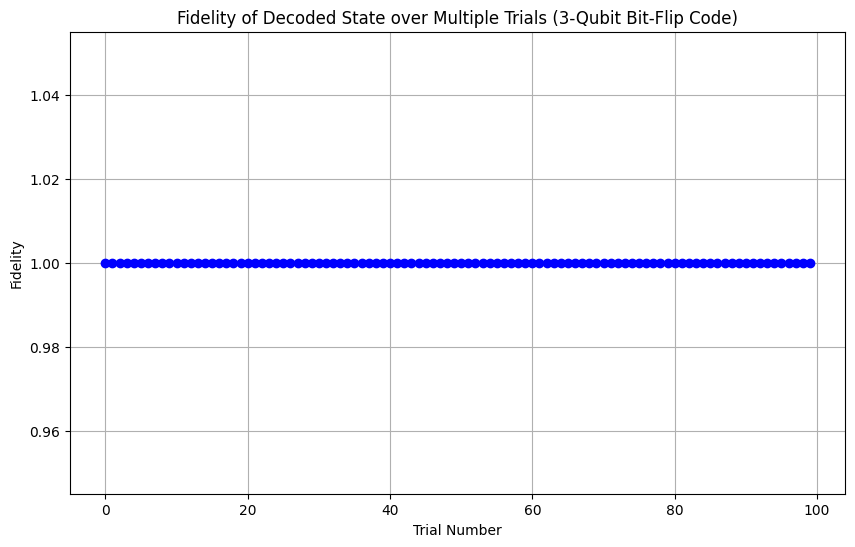

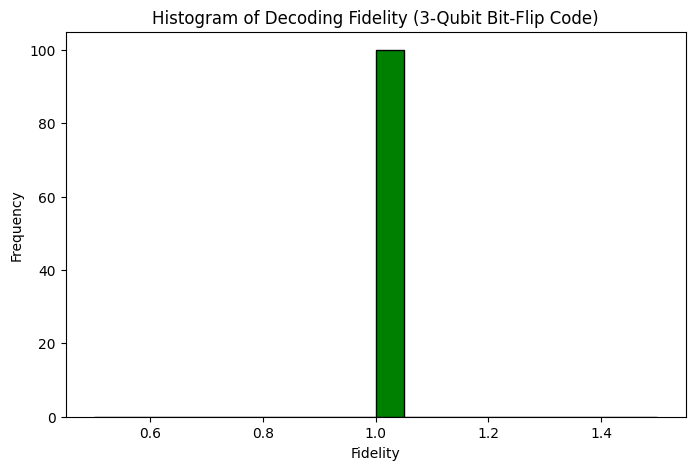

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from error_correction import apply_bit_flip_error, correct_bit_flip_error, decode_three_qubit, encode_three_qubit
from aux_functions import Vector

# Define a helper function to compute fidelity between two quantum states.
def fidelity(state1, state2):
    """
    Computes the fidelity (squared modulus of inner product) between two state Vectors.
    """
    inner = sum(np.conjugate(state1.values[i]) * state2.values[i] for i in range(len(state1.values)))
    return np.abs(inner)**2

# Number of simulation trials.
num_trials = 100
fidelity_list = []

# Initial state: |ψ> = (|0> + |1>)/√2.
initial = Vector([1/np.sqrt(2), 1/np.sqrt(2)])

# Run simulation trials.
for trial in range(num_trials):
    # (1) Encode using three-qubit bit-flip code.
    encoded = encode_three_qubit(initial)
    # (2) Randomly choose a qubit (0, 1, or 2) for a bit-flip error.
    error_qubit = np.random.choice([0, 1, 2])
    errored = apply_bit_flip_error(encoded, error_qubit)
    # (3) Correct the error.
    corrected = correct_bit_flip_error(errored)
    # (4) Decode to recover the original qubit.
    decoded = decode_three_qubit(corrected)
    # (5) Compute fidelity with respect to the initial state.
    fidelity_list.append(fidelity(initial, decoded))

# Plot fidelity evolution over trials.
plt.figure(figsize=(10, 6))
plt.plot(range(num_trials), fidelity_list, marker='o', linestyle='-', color='blue')
plt.xlabel("Trial Number")
plt.ylabel("Fidelity")
plt.title("Fidelity of Decoded State over Multiple Trials (3-Qubit Bit-Flip Code)")
plt.grid(True)
plt.show()

# Plot histogram of fidelity values.
plt.figure(figsize=(8, 5))
plt.hist(fidelity_list, bins=20, edgecolor='black', color='green')
plt.xlabel("Fidelity")
plt.ylabel("Frequency")
plt.title("Histogram of Decoding Fidelity (3-Qubit Bit-Flip Code)")
plt.show()

Simulation of Decoding Fidelity for Shor’s Code (Bit‑Flip vs Phase‑Flip Errors)

This cell performs separate simulations for Shor’s nine‑qubit code. Two sets of trials are run: one with bit‑flip (X) errors and one with phase‑flip (Z) errors. For each, the decoded fidelity is computed and plotted as a line graph (with an accompanying histogram for phase‑flip errors).

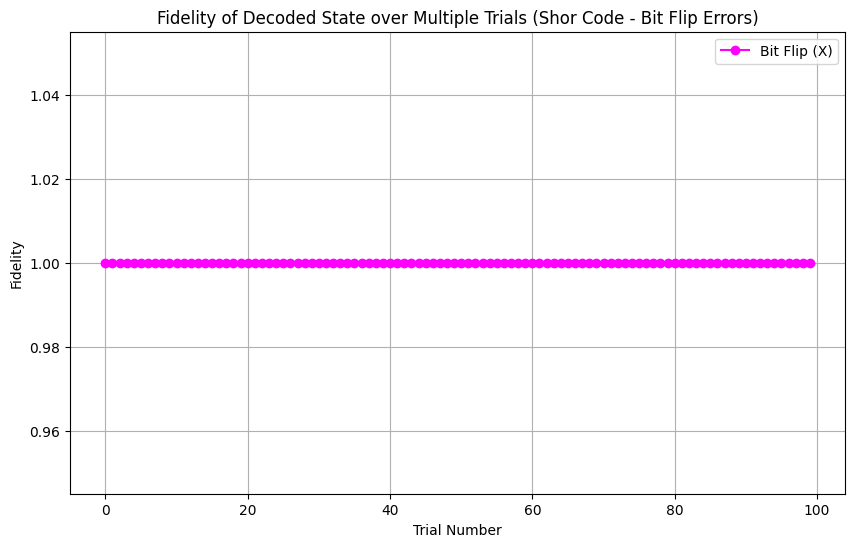

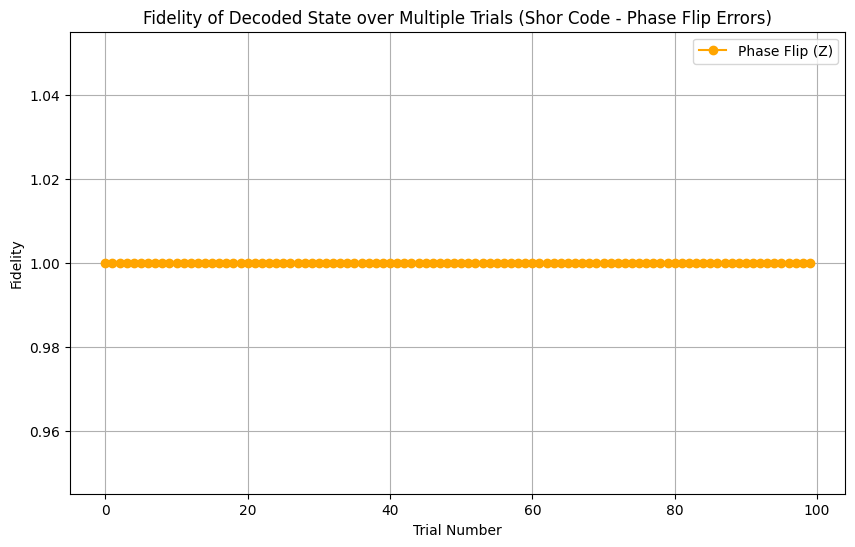

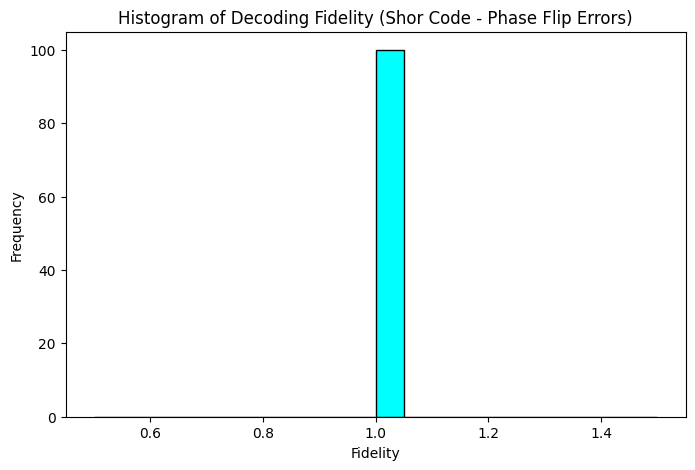

In [2]:
# Use the same fidelity function as before.
from error_correction import apply_error_shor, correct_error_shor, decode_shor, encode_shor


def fidelity(state1, state2):
    inner = sum(np.conjugate(state1.values[i]) * state2.values[i] for i in range(len(state1.values)))
    return np.abs(inner)**2

# Number of simulation trials.
num_trials = 100

# --- Simulation for Bit-Flip (X) Errors in Shor's Code ---
fidelity_shor_X = []
initial = Vector([1/np.sqrt(2), 1/np.sqrt(2)])
for trial in range(num_trials):
    encoded_shor = encode_shor(initial)
    error_qubit = np.random.choice(range(9))
    errored_shor = apply_error_shor(encoded_shor, error_qubit, "X")
    corrected_shor = correct_error_shor(errored_shor, error_qubit, "X")
    decoded_shor = decode_shor(corrected_shor)
    fidelity_shor_X.append(fidelity(initial, decoded_shor))

plt.figure(figsize=(10, 6))
plt.plot(range(num_trials), fidelity_shor_X, marker='o', linestyle='-', color='magenta', label="Bit Flip (X)")
plt.xlabel("Trial Number")
plt.ylabel("Fidelity")
plt.title("Fidelity of Decoded State over Multiple Trials (Shor Code - Bit Flip Errors)")
plt.grid(True)
plt.legend()
plt.show()

# --- Simulation for Phase-Flip (Z) Errors in Shor's Code ---
fidelity_shor_Z = []
for trial in range(num_trials):
    encoded_shor = encode_shor(initial)
    error_qubit = np.random.choice(range(9))
    errored_shor = apply_error_shor(encoded_shor, error_qubit, "Z")
    corrected_shor = correct_error_shor(errored_shor, error_qubit, "Z")
    decoded_shor = decode_shor(corrected_shor)
    fidelity_shor_Z.append(fidelity(initial, decoded_shor))

plt.figure(figsize=(10, 6))
plt.plot(range(num_trials), fidelity_shor_Z, marker='o', linestyle='-', color='orange', label="Phase Flip (Z)")
plt.xlabel("Trial Number")
plt.ylabel("Fidelity")
plt.title("Fidelity of Decoded State over Multiple Trials (Shor Code - Phase Flip Errors)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(fidelity_shor_Z, bins=20, edgecolor='black', color='cyan')
plt.xlabel("Fidelity")
plt.ylabel("Frequency")
plt.title("Histogram of Decoding Fidelity (Shor Code - Phase Flip Errors)")
plt.show()

##Three‑Qubit Bit‑Flip Code Tests

Initial state: [0.7071067811865475, 0.7071067811865475]
Encoded state (3 qubits):
[0.7071067811865475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7071067811865475]


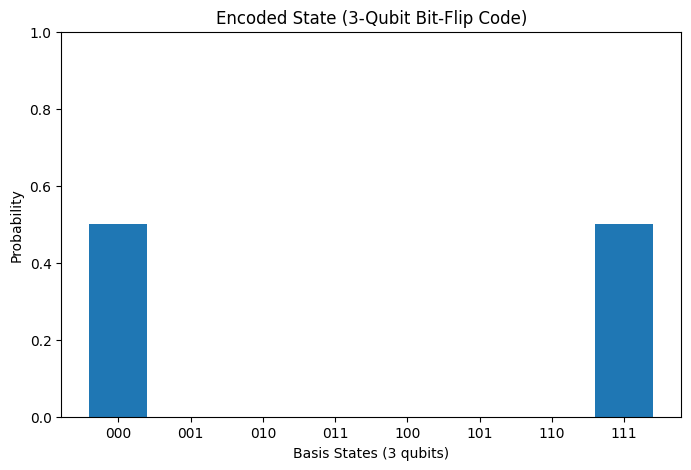

Decoded state (no error): [0.7071067811865475, 0.7071067811865475]
State after bit-flip error on qubit 1:
[0.0, 0.0, 0.7071067811865475, 0.0, 0.0, 0.7071067811865475, 0.0, 0.0]


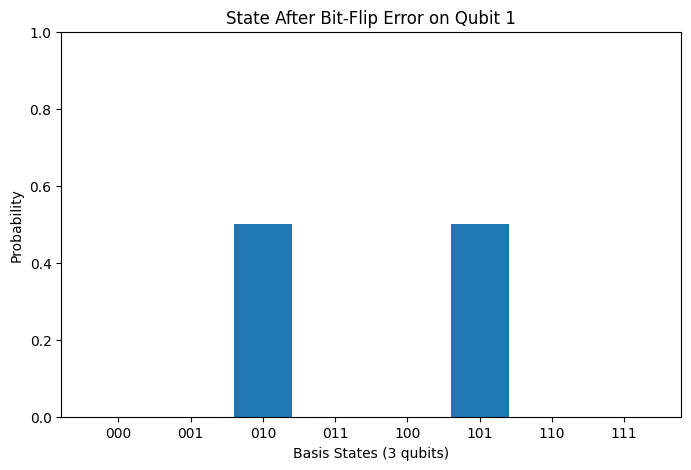

Diagnosed error on qubit: 1
State after error correction:
[0.7071067811865475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7071067811865475]


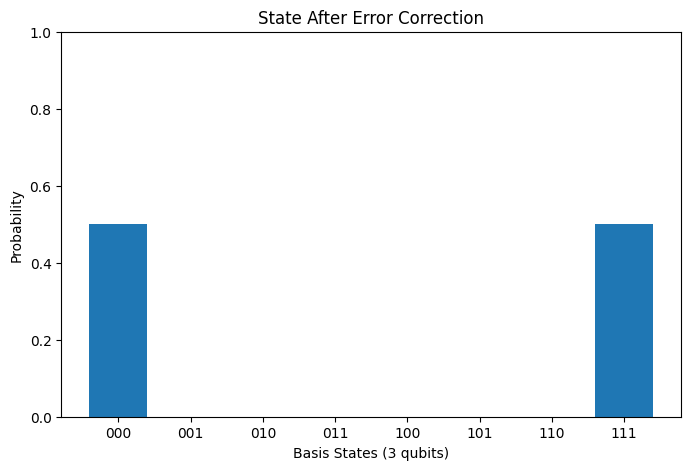

Decoded state after correction: [0.7071067811865475, 0.7071067811865475]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from error_correction import apply_bit_flip_error, correct_bit_flip_error, decode_three_qubit, diagnose_bit_flip_error, encode_three_qubit
from aux_functions import Vector

# --- Helper function to plot probabilities for a 3-qubit state ---
def plot_state_probabilities(vector, title):
    """
    Plots the probability distribution of a 3-qubit state.
    The vector is assumed to be an instance of the Vector class with a .values list.
    """
    amplitudes = np.array(vector.values)
    probabilities = np.abs(amplitudes)**2
    # For a 3-qubit system, there are 2^3 = 8 basis states labeled as 3-bit strings.
    basis_states = [format(i, '03b') for i in range(len(probabilities))]
    
    plt.figure(figsize=(8, 5))
    plt.bar(basis_states, probabilities)
    plt.xlabel("Basis States (3 qubits)")
    plt.ylabel("Probability")
    plt.title(title)
    plt.ylim(0, 1)
    plt.show()

# --- Three-Qubit Bit-Flip Code Analysis ---
# Create an initial state |ψ> = (|0> + |1>)/√2
alpha = 1/np.sqrt(2)
beta  = 1/np.sqrt(2)
initial = Vector([alpha, beta])
print("Initial state:", initial)

# 1. Encode the state into the three-qubit bit-flip code.
encoded = encode_three_qubit(initial)
print("Encoded state (3 qubits):")
print(encoded)
plot_state_probabilities(encoded, "Encoded State (3-Qubit Bit-Flip Code)")

# 2. Decode without error to verify encoding/decoding.
decoded_no_error = decode_three_qubit(encoded)
print("Decoded state (no error):", decoded_no_error)

# 3. Simulate an error: apply a bit-flip error on qubit 1.
errored = apply_bit_flip_error(encoded, 1)
print("State after bit-flip error on qubit 1:")
print(errored)
plot_state_probabilities(errored, "State After Bit-Flip Error on Qubit 1")

# 4. Diagnose the error.
error_qubit = diagnose_bit_flip_error(errored)
print("Diagnosed error on qubit:", error_qubit)

# 5. Correct the error.
corrected = correct_bit_flip_error(errored)
print("State after error correction:")
print(corrected)
plot_state_probabilities(corrected, "State After Error Correction")

# 6. Decode the corrected state.
decoded = decode_three_qubit(corrected)
print("Decoded state after correction:", decoded)

## Analysis & Visualization for Shor’s Nine‑Qubit Code

Initial state: [0.7071067811865475, 0.7071067811865475]
Encoded state (Shor): vector length = 512


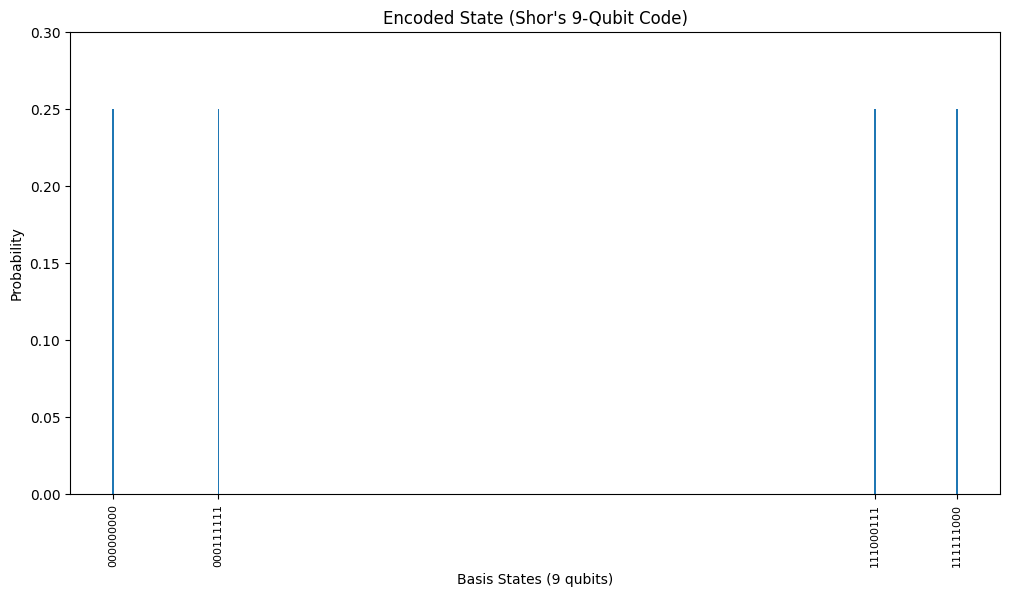

State after bit-flip error (X) on qubit 4 applied.


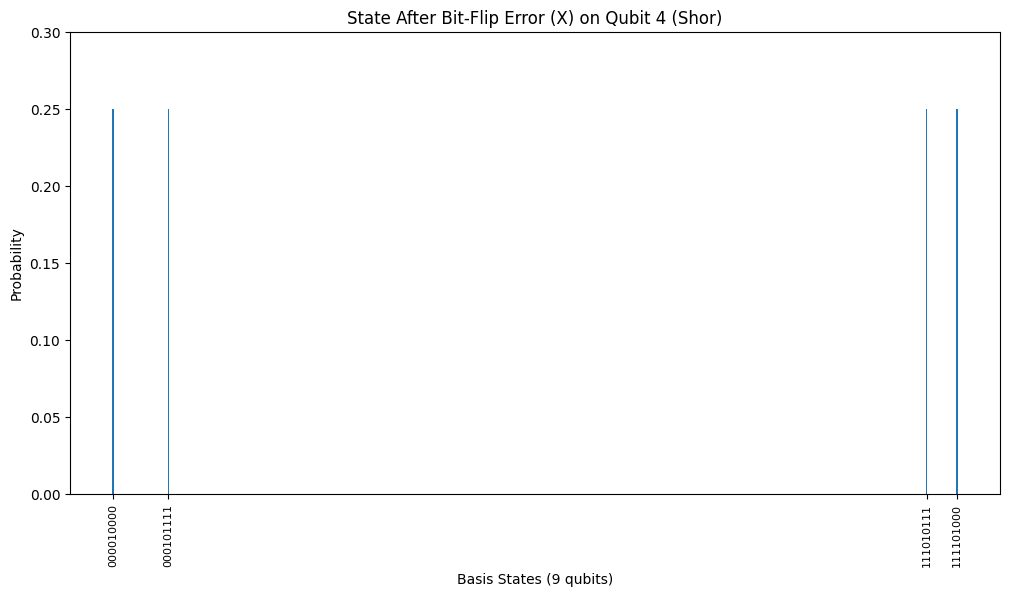

State after bit-flip error correction.


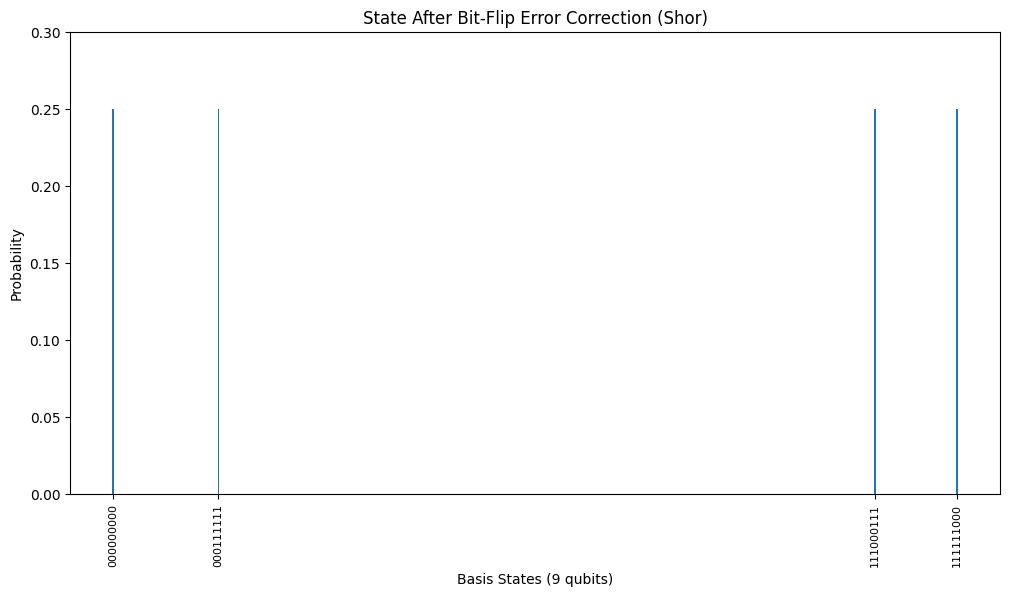

Decoded state after bit-flip correction: [0.7071067811865471, 0.7071067811865471]
State after phase-flip error (Z) on qubit 2 applied.


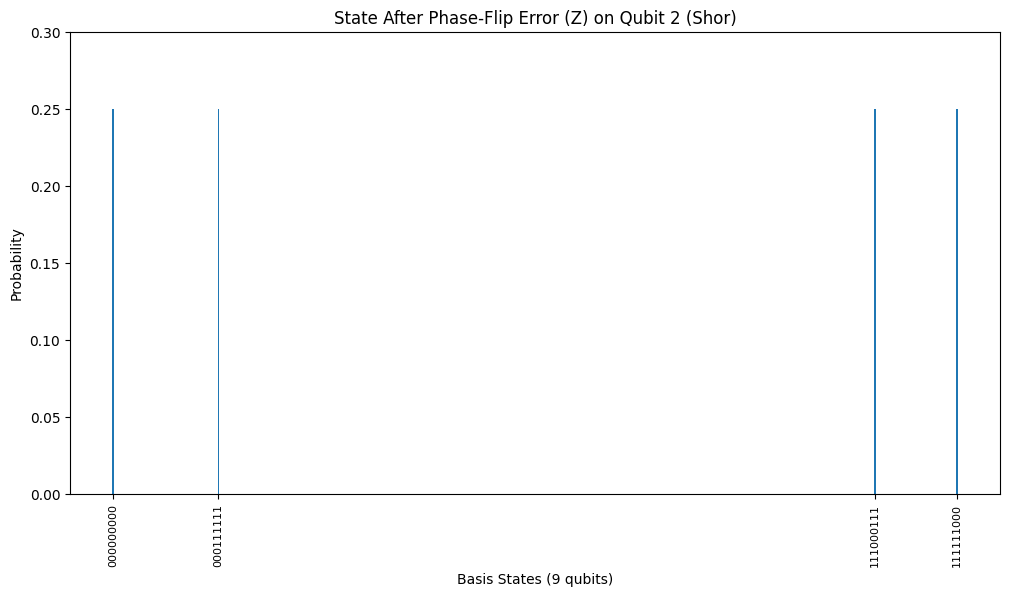

State after phase-flip error correction.


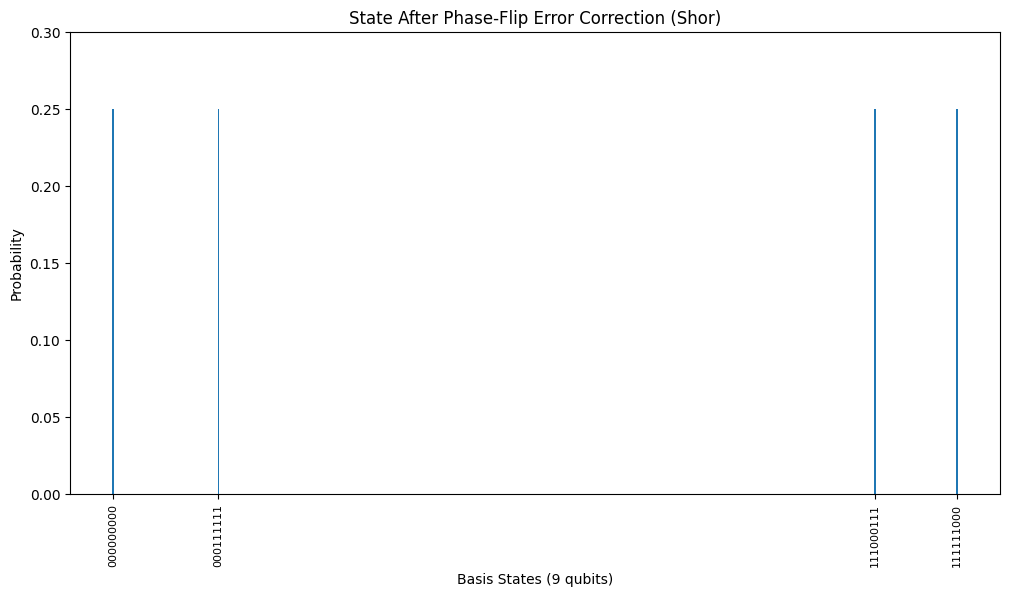

Decoded state after phase-flip correction: [0.7071067811865471, 0.7071067811865471]


In [4]:
from error_correction import apply_error_shor, correct_error_shor, decode_shor, encode_shor


def plot_state_probabilities_n(qubit_count, vector, title, threshold=1e-6):
    """
    Plots only the basis states with non-negligible probabilities.
    For a 9-qubit system, vector has 2^9 = 512 entries.
    Only states with probability > threshold are plotted.
    """
    amplitudes = np.array(vector.values)
    probabilities = np.abs(amplitudes)**2
    indices = np.arange(len(probabilities))
    indices_nonzero = indices[probabilities > threshold]
    probabilities_nonzero = probabilities[probabilities > threshold]
    labels = [format(i, f'0{qubit_count}b') for i in indices_nonzero]
    
    plt.figure(figsize=(12, 6))
    plt.bar(indices_nonzero, probabilities_nonzero)
    plt.xlabel("Basis States (9 qubits)")
    plt.ylabel("Probability")
    plt.title(title)
    plt.ylim(0, max(probabilities_nonzero)*1.2)
    plt.xticks(indices_nonzero, labels, rotation=90, fontsize=8)
    plt.show()

# --- Shor's Nine-Qubit Code Analysis ---
# Create an initial state |ψ> = (|0> + |1>)/√2
alpha = 1/np.sqrt(2)
beta  = 1/np.sqrt(2)
initial = Vector([alpha, beta])
print("Initial state:", initial)

# 1. Encode the state using Shor's nine-qubit code.
encoded_shor = encode_shor(initial)
print("Encoded state (Shor): vector length =", len(encoded_shor.values))
plot_state_probabilities_n(9, encoded_shor, "Encoded State (Shor's 9-Qubit Code)")

# 2. Simulate a bit-flip error (X error) on qubit 4.
errored_shor_X = apply_error_shor(encoded_shor, 4, "X")
print("State after bit-flip error (X) on qubit 4 applied.")
plot_state_probabilities_n(9, errored_shor_X, "State After Bit-Flip Error (X) on Qubit 4 (Shor)")

# 3. Correct the bit-flip error.
corrected_shor_X = correct_error_shor(errored_shor_X, 4, "X")
print("State after bit-flip error correction.")
plot_state_probabilities_n(9, corrected_shor_X, "State After Bit-Flip Error Correction (Shor)")

# 4. Decode the corrected state.
decoded_shor_X = decode_shor(corrected_shor_X)
print("Decoded state after bit-flip correction:", decoded_shor_X)

# 5. Now simulate a phase-flip error (Z error) on qubit 2.
errored_shor_Z = apply_error_shor(encoded_shor, 2, "Z")
print("State after phase-flip error (Z) on qubit 2 applied.")
plot_state_probabilities_n(9, errored_shor_Z, "State After Phase-Flip Error (Z) on Qubit 2 (Shor)")

# 6. Correct the phase-flip error.
corrected_shor_Z = correct_error_shor(errored_shor_Z, 2, "Z")
print("State after phase-flip error correction.")
plot_state_probabilities_n(9, corrected_shor_Z, "State After Phase-Flip Error Correction (Shor)")

# 7. Decode the corrected state.
decoded_shor_Z = decode_shor(corrected_shor_Z)
print("Decoded state after phase-flip correction:", decoded_shor_Z)

Simulation of Measurement Outcomes for the Corrected Three‑Qubit Code

The "Simulation of Measurement Outcomes for the Corrected Three‑Qubit Code" section simulates the process of measuring a quantum state multiple times and visualizes the results. Here's a breakdown of what it does:

1. **Function Definition (`simulate_measurements`)**:
    - This function takes a quantum state (`vector`) and the number of measurement trials (`num_trials`).
    - It calculates the probabilities of each basis state from the amplitudes of the quantum state.
    - It simulates measurements by generating random numbers and determining which basis state would be observed based on the cumulative probabilities.
    - It returns a list of measurement outcomes (indices of the basis states).

2. **Simulation Execution**:
    - The function is called with the `corrected` quantum state (which is the state after error correction) and `num_trials` set to 1000.
    - The measurement outcomes are stored in the `measurements` list.

3. **Histogram Plotting**:
    - A histogram of the measurement outcomes is plotted.
    - The x-axis represents the indices of the basis states (0 to 7 for a 3-qubit system).
    - The y-axis represents the frequency of each basis state being measured.
    - The x-axis labels are formatted as 3-bit binary strings to represent the basis states.

This simulation helps visualize the distribution of measurement outcomes for the corrected three-qubit state, showing how often each basis state is observed in repeated measurements.

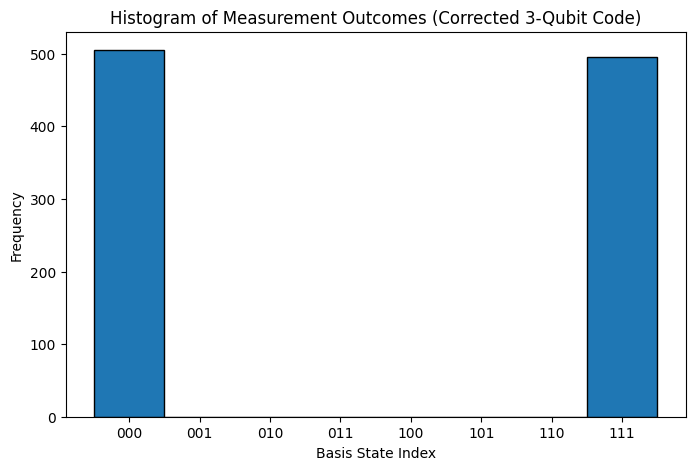

In [6]:
def simulate_measurements(vector, num_trials=1000):
    """
    Simulates a series of measurements on the provided quantum state (Vector).
    Returns the indices (in decimal) of the measured basis states.
    """
    amplitudes = np.array(vector.values)
    probabilities = np.abs(amplitudes)**2
    outcomes = []
    for _ in range(num_trials):
        r = np.random.rand()
        cumulative = 0
        for index, prob in enumerate(probabilities):
            cumulative += prob
            if r < cumulative:
                outcomes.append(index)
                break
    return outcomes

num_trials = 1000
measurements = simulate_measurements(corrected, num_trials)

# Plot histogram of measurement outcomes.
plt.figure(figsize=(8, 5))
# There are 8 possible basis states for 3 qubits (indices 0 to 7).
plt.hist(measurements, bins=np.arange(-0.5, 8.5, 1), edgecolor='black')
plt.xlabel("Basis State Index")
plt.ylabel("Frequency")
plt.title("Histogram of Measurement Outcomes (Corrected 3-Qubit Code)")
# Label the x-axis with binary representations.
plt.xticks(np.arange(0, 8), [format(i, '03b') for i in range(8)])
plt.show()